In [9]:
import pandas as pd

#fix \t seperator to , seperator
text = open("marketing_campaign.csv", "r")
text = ''.join([i for i in text]) \
    .replace("\t", ",")
x = open("marketing_campaign_commas.csv","w")
x.writelines(text)
x.close()

#accept data and print
data = pd.read_csv("marketing_campaign_commas.csv")
print(data.head())

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

In [10]:
#look for null values
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
ID                     2240 non-null int64
Year_Birth             2240 non-null int64
Education              2240 non-null object
Marital_Status         2240 non-null object
Income                 2216 non-null float64
Kidhome                2240 non-null int64
Teenhome               2240 non-null int64
Dt_Customer            2240 non-null object
Recency                2240 non-null int64
MntWines               2240 non-null int64
MntFruits              2240 non-null int64
MntMeatProducts        2240 non-null int64
MntFishProducts        2240 non-null int64
MntSweetProducts       2240 non-null int64
MntGoldProds           2240 non-null int64
NumDealsPurchases      2240 non-null int64
NumWebPurchases        2240 non-null int64
NumCatalogPurchases    2240 non-null int64
NumStorePurchases      2240 non-null int64
NumWebVisitsMonth      2240 non-null int64
AcceptedCmp3           2240 

In [11]:
#turn unusable values in NA
data = data.drop(data[((data['Marital_Status'] != 'Single')
                        & (data['Marital_Status'] != 'Married')
                        & (data['Marital_Status'] != 'Together')
                        & (data['Marital_Status'] != 'Divorced')
                        & (data['Marital_Status'] != 'Widow'))].index)

print(data['Marital_Status'].value_counts())
#drop rows w/ NA
data = data.dropna()

#Change string values into integer
data['Marital_Status'] = data['Marital_Status'].replace('Single', 0)
data['Marital_Status'] = data['Marital_Status'].replace('Married', 1)
data['Marital_Status'] = data['Marital_Status'].replace('Together', 2)
data['Marital_Status'] = data['Marital_Status'].replace('Divorced', 3)
data['Marital_Status'] = data['Marital_Status'].replace('Widow', 4)

#change Dt_Customer to DateTime
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

print(data.info())

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Name: Marital_Status, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2209 entries, 0 to 2239
Data columns (total 29 columns):
ID                     2209 non-null int64
Year_Birth             2209 non-null int64
Education              2209 non-null object
Marital_Status         2209 non-null int64
Income                 2209 non-null float64
Kidhome                2209 non-null int64
Teenhome               2209 non-null int64
Dt_Customer            2209 non-null datetime64[ns]
Recency                2209 non-null int64
MntWines               2209 non-null int64
MntFruits              2209 non-null int64
MntMeatProducts        2209 non-null int64
MntFishProducts        2209 non-null int64
MntSweetProducts       2209 non-null int64
MntGoldProds           2209 non-null int64
NumDealsPurchases      2209 non-null int64
NumWebPurchases        2209 non-null int64
NumCatalogPurchases    2209 non-nul

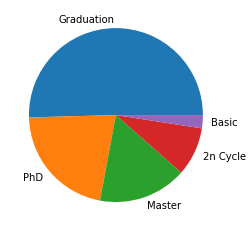

In [12]:
import matplotlib.pyplot as plt
import numpy as np

#pie chart for education values
y = data["Education"].value_counts()
myLabels = y.index
plt.pie(y, labels = myLabels)
plt.show()

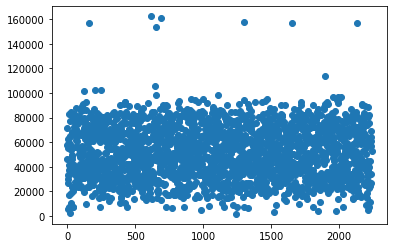

In [13]:
#remove outlier value
data = data[data['Income'] <= 200000]

y = data["Income"]
x = y.index
plt.scatter(x, y)
plt.show()

In [14]:
from sklearn.tree import DecisionTreeRegressor

#Input and Output for model
y = data.Income[50:]
features = ['Marital_Status', 'Kidhome', 'Teenhome', 'MntWines',
    'MntFruits', 'MntMeatProducts', 'MntFishProducts',
    'MntSweetProducts', 'MntGoldProds']
X = data[features][50:]
#build model and run prediction
model = DecisionTreeRegressor(random_state=1)
model.fit(X, y)
predicted_income = model.predict(X.head())
predicted_income

     ID  Year_Birth   Education  Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation               0  58138.0        0         0   
1  2174        1954  Graduation               0  46344.0        1         1   
2  4141        1965  Graduation               2  71613.0        0         0   
3  6182        1984  Graduation               2  26646.0        1         0   
4  5324        1981         PhD               1  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-04-09       58       635  ...                  7             0   
1  2014-08-03       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-10-02       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0        

array([66373., 82384., 70287., 27938., 55954.])

In [7]:
from sklearn.metrics import mean_absolute_error

#mean_absolute_error(y[:5], predicted_income)